<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** 

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** Problem: For student from research club who need to understand why her allergies worse when it rains and decide to develop a comprehensive understanding of the interplay between rain and allergies.

Background: Air pollution and climate change can promote allergies by influencing the human body and immune system, as well as the abundance and potency of environmental allergens and adjuvants.Climate parameters and air pollutants can influence the release, potency, and effects of allergens and adjuvants: 
temperature (T), relative humidity (RH), ultraviolet (UV) radiation, particulate matter (PM), ozone and nitrogen oxides (O3, NOx)

Objectives: Develop a comprehensive understanding of the interplay between rain and allergies ,identify strategies for prevent or reduce allergies triggered by rain.

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** https://www.aqi.in/blog/effect-of-rain-on-air-pollution/ ,
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5453620/

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def manually_mean(numbers):
    return sum(numbers) / len(numbers)
    
    

In [2]:
manually_mean([1,2,3,4,5])

3.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
# Code:
def manually_std(nums):
    new_mean = manually_mean(nums)
    sum_std = 0
    for i in nums:
        x = (i - new_mean)**2
        sum_std += x
    return (sum_std/len(nums))**0.5
    

In [4]:
manually_std([7,15,20,33,58])

17.828067758453244

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [5]:
# Imports:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import plotly.express as px

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [6]:
# Code:
rain_days = pd.read_csv('rainfall-monthly-number-of-rain-days.csv')
rain_total = pd.read_csv('rainfall-monthly-total.csv')
sunny = pd.read_csv('sunshine-duration-monthly-mean-daily-duration.csv')
rh = pd.read_csv('RelativeHumidityMonthlyMean.csv')
air_nd = pd.read_csv('AirPollutantNitrogenDioxide.csv')
temp_min = pd.read_csv('surface-air-temperature-monthly-mean-daily-minimum.csv')
temp_max = pd.read_csv('SurfaceAirTemperatureMonthlyMeanDailyMaximum.csv')
pm_25 = pd.read_csv('AirPollutantParticulateMatterPM2.5.csv')
ozone = pd.read_csv('air-pollutant-ozone.csv')


In [7]:
print(rain_days.head())
print(rain_total.head())
print(sunny.head())
print(rh.head())
print(temp_min.head())
print(temp_max.head())
print(air_nd.head())
print(pm_25.head())
print(ozone.head())


     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10
     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2
     month  mean_sunshine_hrs
0  1982-01                5.6
1  1982-02                7.6
2  1982-03                5.1
3  1982-04                4.7
4  1982-05                5.8
     month  mean_rh
0  1982-01     81.2
1  1982-02     79.5
2  1982-03     82.3
3  1982-04     85.9
4  1982-05     83.2
     month  temp_mean_daily_min
0  1982-01                 23.3
1  1982-02                 23.9
2  1982-03                 24.3
3  1982-04                 24.3
4  1982-05                 25.2
     month  temp_mean_daily_max
0  1982-01                 29.8
1  1982-02                 32.3
2  1982-03                 31.7
3  1982-04                 31.4
4  1982-05  

In [8]:
print(rain_days.info())
print(rain_total.info())
print(sunny.info())
print(rh.info())
print(temp_min.info())
print(temp_max.info())
print(air_nd.info())
print(pm_25.info())
print(ozone.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              497 non-null    object 
 1   mean_sunshine_hrs  497 non-null    float64
dtypes: float64(1), 

In [9]:
weather= pd.merge(left = rain_days,
                    right = rain_total,
                    how = 'left',
                    on = 'month')

In [10]:
weather = pd.merge(left = weather,
                    right = sunny,
                    how = 'left',
                    on = 'month')

In [11]:
weather = pd.merge(left = weather,
                    right = temp_max,
                    how = 'left',
                    on = 'month')

In [12]:
weather = pd.merge(left = weather,
                    right = temp_min,
                    how = 'left',
                    on = 'month')

In [13]:
weather = pd.merge(left = weather,
                    right = rh,
                    how = 'left',
                    on = 'month')
weather.head()

,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,temp_mean_daily_min,mean_rh
0,1982-01,10,107.1,5.6,29.8,23.3,81.2
1,1982-02,5,27.8,7.6,32.3,23.9,79.5
2,1982-03,11,160.8,5.1,31.7,24.3,82.3
3,1982-04,14,157.0,4.7,31.4,24.3,85.9
4,1982-05,10,102.2,5.8,31.7,25.2,83.2


In [14]:
print(weather.isna().sum())
print(weather.dtypes)
print(weather.info())

month                  0
no_of_rainy_days       0
total_rainfall         0
mean_sunshine_hrs      0
temp_mean_daily_max    0
temp_mean_daily_min    0
mean_rh                0
dtype: int64
month                   object
no_of_rainy_days         int64
total_rainfall         float64
mean_sunshine_hrs      float64
temp_mean_daily_max    float64
temp_mean_daily_min    float64
mean_rh                float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                488 non-null    object 
 1   no_of_rainy_days     488 non-null    int64  
 2   total_rainfall       488 non-null    float64
 3   mean_sunshine_hrs    488 non-null    float64
 4   temp_mean_daily_max  488 non-null    float64
 5   temp_mean_daily_min  488 non-null    float64
 6   mean_rh              488 non-null    float64
dtypes: float64(5), int64(1

In [15]:
weather['month'] = pd.to_datetime(weather['month'])

In [16]:
weather['year'] = pd.DatetimeIndex(weather['month']).year
weather['Month'] = pd.DatetimeIndex(weather['month']).month
weather.head()

,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,temp_mean_daily_min,mean_rh,year,Month
0,1982-01-01,10,107.1,5.6,29.8,23.3,81.2,1982,1
1,1982-02-01,5,27.8,7.6,32.3,23.9,79.5,1982,2
2,1982-03-01,11,160.8,5.1,31.7,24.3,82.3,1982,3
3,1982-04-01,14,157.0,4.7,31.4,24.3,85.9,1982,4
4,1982-05-01,10,102.2,5.8,31.7,25.2,83.2,1982,5


In [17]:
air_polls = pd.merge(left = air_nd,
                    right = pm_25,
                    how = 'left',
                    on = 'year')

In [18]:
air_polls = pd.merge(left = air_polls,
                    right = ozone,
                    how = 'left',
                    on = 'year')
air_polls.head()

,year,nitrogen_dioxide_mean,pm2.5_mean,ozone_maximum_8hour_mean
0,2000,30,NaN,112.0
1,2001,26,NaN,133.0
2,2002,27,23.0,131.0
3,2003,24,19.0,118.0
4,2004,26,21.0,146.0


In [19]:
print(air_polls.isna().sum())
print(air_polls.dtypes)
print(air_polls.info())

year                        0
nitrogen_dioxide_mean       0
pm2.5_mean                  2
ozone_maximum_8hour_mean    1
dtype: int64
year                          int64
nitrogen_dioxide_mean         int64
pm2.5_mean                  float64
ozone_maximum_8hour_mean    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      23 non-null     int64  
 1   nitrogen_dioxide_mean     23 non-null     int64  
 2   pm2.5_mean                21 non-null     float64
 3   ozone_maximum_8hour_mean  22 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 920.0 bytes
None


In [20]:
rainsday = weather.groupby('year')['no_of_rainy_days'].sum()
totalrains_sum = weather.groupby('year')['total_rainfall'].sum()
sunshine_mean = weather.groupby('year')['mean_sunshine_hrs'].mean()
temp_mean_min = weather.groupby('year')['temp_mean_daily_min'].mean()
temp_mean_max = weather.groupby('year')['temp_mean_daily_max'].mean()
mean_rh = weather.groupby('year')['mean_rh'].mean()



In [21]:
air_poll = pd.merge(left = air_polls,
                    right = rainsday ,
                    how = 'left',
                    on = 'year')

In [22]:
air_poll = pd.merge(left = air_poll,
                    right = totalrains_sum ,
                    how = 'left',
                    on = 'year')

In [23]:
air_poll = pd.merge(left = air_poll,
                    right = sunshine_mean ,
                    how = 'left',
                    on = 'year')

In [24]:
air_poll = pd.merge(left = air_poll,
                    right = temp_mean_min ,
                    how = 'left',
                    on = 'year')

In [25]:
air_poll = pd.merge(left = air_poll,
                    right = temp_mean_max,
                    how = 'left',
                    on = 'year')

In [26]:
air_poll = pd.merge(left = air_poll,
                    right = mean_rh,
                    how = 'left',
                    on = 'year')
air_poll.head()

,year,nitrogen_dioxide_mean,pm2.5_mean,ozone_maximum_8hour_mean,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_min,temp_mean_daily_max,mean_rh
0,2000,30,NaN,112.0,188,2370.5,5.166667,24.691667,31.408333,84.741667
1,2001,26,NaN,133.0,184,2783.1,5.216667,24.858333,31.350000,84.266667
2,2002,27,23.0,131.0,139,1748.9,6.300000,25.241667,32.033333,82.491667
3,2003,24,19.0,118.0,186,2391.2,5.433333,25.058333,31.433333,84.300000
4,2004,26,21.0,146.0,147,2136.4,5.966667,25.100000,31.716667,83.466667


In [27]:
air_poll = air_poll.rename(columns={'nitrogen_dioxide_mean' : 'no2_mean',
                                    'ozone_maximum_8hour_mean' : 'o3_mean',
                                    'no_of_rainy_days' : 'rainydays' , 
                                    'total_rainfall' : 'totalrainfall' ,
                                    'mean_sunshine_hrs': 'sunshine_mean',
                                    'temp_mean_daily_min' : 'temp_min',
                                    'temp_mean_daily_max':'temp_max',
                                    'mean_rh' : 'rh_mean'})
air_poll.head()

,year,no2_mean,pm2.5_mean,o3_mean,rainydays,totalrainfall,sunshine_mean,temp_min,temp_max,rh_mean
0,2000,30,NaN,112.0,188,2370.5,5.166667,24.691667,31.408333,84.741667
1,2001,26,NaN,133.0,184,2783.1,5.216667,24.858333,31.350000,84.266667
2,2002,27,23.0,131.0,139,1748.9,6.300000,25.241667,32.033333,82.491667
3,2003,24,19.0,118.0,186,2391.2,5.433333,25.058333,31.433333,84.300000
4,2004,26,21.0,146.0,147,2136.4,5.966667,25.100000,31.716667,83.466667


In [28]:
air_poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           23 non-null     int64  
 1   no2_mean       23 non-null     int64  
 2   pm2.5_mean     21 non-null     float64
 3   o3_mean        22 non-null     float64
 4   rainydays      23 non-null     int64  
 5   totalrainfall  23 non-null     float64
 6   sunshine_mean  23 non-null     float64
 7   temp_min       23 non-null     float64
 8   temp_max       23 non-null     float64
 9   rh_mean        23 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 2.0 KB


In [29]:
air_poll.dropna(subset = ["pm2.5_mean" , 'o3_mean' ], inplace=True)

In [30]:
air_poll = air_poll[['year', 
                     'rainydays', 
                     'totalrainfall', 
                     'sunshine_mean', 
                     'temp_min',
                     'temp_max',
                     'rh_mean' , 
                     'pm2.5_mean' , 
                     'o3_mean', 
                     'no2_mean']]

In [31]:
air_poll.head()

,year,rainydays,totalrainfall,sunshine_mean,temp_min,temp_max,rh_mean,pm2.5_mean,o3_mean,no2_mean
2,2002,139,1748.9,6.300000,25.241667,32.033333,82.491667,23.0,131.0,27
3,2003,186,2391.2,5.433333,25.058333,31.433333,84.300000,19.0,118.0,24
4,2004,147,2136.4,5.966667,25.100000,31.716667,83.466667,21.0,146.0,26
5,2005,175,1930.7,6.066667,25.100000,31.858333,83.158333,21.0,159.0,25
6,2006,174,2753.2,5.633333,25.016667,31.475000,84.591667,23.0,136.0,24


In [32]:
air_poll.shape

(20, 10)

In [33]:
air_poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2 to 21
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           20 non-null     int64  
 1   rainydays      20 non-null     int64  
 2   totalrainfall  20 non-null     float64
 3   sunshine_mean  20 non-null     float64
 4   temp_min       20 non-null     float64
 5   temp_max       20 non-null     float64
 6   rh_mean        20 non-null     float64
 7   pm2.5_mean     20 non-null     float64
 8   o3_mean        20 non-null     float64
 9   no2_mean       20 non-null     int64  
dtypes: float64(7), int64(3)
memory usage: 1.7 KB


In [34]:
import os  
if not os.path.exists('output'):
    os.makedirs('output') 
air_poll.to_csv('output/airpoll.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm| 


**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|:--|:--|:--|:--|
|year|int||Year of collecting data|
|rainydays|int|rainfall-monthly-number-of-rain-days|Monthly number of rain days from 1982 to 2022 if the total rainfallis 0.2mm/day or more.|
|totalrainfall|float|  rainfall-monthly-total|Monthly total rain recorded in mm(millimeters) from 1982 to 2022|
|mean_sunshine_hrs|float|sunshine-duration-monthly-mean-daily-duration|The monthly mean sunshine hours in a day recorded|
|temp_min|float|SurfaceAirTemperatureMonthlyMeanDailyMaximum|The monthly mean daily minimum temperature recorded|
|temp_max|float|surface-air-temperature-monthly-mean-daily-minimum|The monthly mean daily maximum temperature recorded|
|rh_mean|float|RelativeHumidityMonthlyMean.csv|Monthly mean relative humidity|
|pm2.5_mean|float|AirPollutantParticulateMatterPM2.5|  Annual means for PM2.5 (µg/m3) are based on WHO Air Quality Guidelines (global update 2005).|
|o3_mean|float|air-pollutant-ozone.csv|Annual daily maximum 8-hr means for ozone (µg/m3)|
|no2_mean|int|AirPollutantNitrogenDioxide|Annual means for nitrogen dioxide (µg/m3)|




## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [35]:
air_poll.describe()

,year,rainydays,totalrainfall,sunshine_mean,temp_min,temp_max,rh_mean,pm2.5_mean,o3_mean,no2_mean
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000,20.00000
mean,2011.50000,172.750000,2108.945000,5.830833,25.180833,31.593333,81.386667,17.95000,144.80000,24.05000
std,5.91608,24.239756,472.428975,0.370890,0.341480,0.348835,2.937208,3.56112,26.75739,1.79106
min,2002.00000,120.000000,1267.100000,5.241667,24.708333,31.091667,75.950000,11.00000,105.00000,20.00000
25%,2006.75000,162.500000,1852.175000,5.564583,24.972917,31.260417,78.506250,15.75000,124.50000,22.75000
50%,2011.50000,178.500000,2060.350000,5.837500,25.100000,31.625000,82.558333,18.50000,139.00000,24.50000
75%,2016.25000,188.000000,2424.450000,6.016667,25.283333,31.862500,83.468750,20.25000,153.75000,25.00000
max,2021.00000,206.000000,2886.200000,6.783333,25.916667,32.300000,84.625000,24.00000,206.00000,27.00000


In [36]:
sd = {columns: manually_std(nums) for columns, nums in air_poll.items()}
sd

{'year': 5.766281297335398,
 'rainydays': 23.62599204266352,
 'totalrainfall': 460.46680605120713,
 'sunshine_mean': 0.36149861687148965,
 'temp_min': 0.3328340010008329,
 'temp_max': 0.34000204247752547,
 'rh_mean': 2.8628358609369613,
 'pm2.5_mean': 3.4709508783617204,
 'o3_mean': 26.07987730032486,
 'no2_mean': 1.745709025009609}

In [37]:
#Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
rain_total.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [38]:
rain_total['month'] = pd.to_datetime(rain_total['month'])
rain_total['year'] = pd.DatetimeIndex(rain_total['month']).year
rain_total['Month'] = pd.DatetimeIndex(rain_total['month']).month
# del rain_total['month']
rain_total.head()

,month,total_rainfall,year,Month
0,1982-01-01,107.1,1982,1
1,1982-02-01,27.8,1982,2
2,1982-03-01,160.8,1982,3
3,1982-04-01,157.0,1982,4
4,1982-05-01,102.2,1982,5


In [39]:
select_year = rain_total.loc[(rain_total['year'] == 1990) | 
                             (rain_total['year'] == 2000) | 
                             (rain_total['year'] == 2010) |
                             (rain_total['year'] == 2020)
                            ]
select_year.head()

,month,total_rainfall,year,Month
96,1990-01-01,147.4,1990,1
97,1990-02-01,24.1,1990,2
98,1990-03-01,94.2,1990,3
99,1990-04-01,52.4,1990,4
100,1990-05-01,180.1,1990,5


In [40]:
high_rainfall = select_year.loc[select_year.groupby('year')['total_rainfall'].idxmax()]

high_rainfall.head()

,month,total_rainfall,year,Month
104,1990-09-01,204.5,1990,9
226,2000-11-01,385.7,2000,11
342,2010-07-01,298.5,2010,7
460,2020-05-01,255.6,2020,5


In [41]:
low_rainfall = select_year.loc[select_year.groupby('year')['total_rainfall'].idxmin()]
low_rainfall.head()

,month,total_rainfall,year,Month
97,1990-02-01,24.1,1990,2
224,2000-09-01,81.1,2000,9
337,2010-02-01,6.3,2010,2
457,2020-02-01,65.0,2020,2


In [42]:
# Which year have the highest and lowest total rainfall in the date range of analysis? range >> 2002-2022

high_rainfalls = air_poll[air_poll['totalrainfall'] == air_poll['totalrainfall'].max()]

high_rainfalls[["year", "totalrainfall"]]

,year,totalrainfall
7,2007,2886.2


In [43]:
low_rainfalls = air_poll[air_poll['totalrainfall'] == air_poll['totalrainfall'].min()]

low_rainfalls[["year", "totalrainfall"]]

,year,totalrainfall
15,2015,1267.1


In [44]:
# Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
rain_days['month'] = pd.to_datetime(rain_days['month'])
rain_days['year'] = pd.DatetimeIndex(rain_days['month']).year
rain_days['Month'] = pd.DatetimeIndex(rain_days['month']).month
# del rain_days['month']
rain_days.head()

,month,no_of_rainy_days,year,Month
0,1982-01-01,10,1982,1
1,1982-02-01,5,1982,2
2,1982-03-01,11,1982,3
3,1982-04-01,14,1982,4
4,1982-05-01,10,1982,5


In [45]:
year_rain = rain_days.loc[(rain_days['year'] == 1990) |
                          (rain_days['year'] == 2000) |
                          (rain_days['year'] == 2010) |
                          (rain_days['year'] == 2020)
                            ]
year_rain.head()

,month,no_of_rainy_days,year,Month
96,1990-01-01,13,1990,1
97,1990-02-01,8,1990,2
98,1990-03-01,4,1990,3
99,1990-04-01,10,1990,4
100,1990-05-01,11,1990,5


In [46]:
high_raindays = year_rain.loc[year_rain.groupby('year')['no_of_rainy_days'].idxmax()]

high_raindays

,month,no_of_rainy_days,year,Month
104,1990-09-01,17,1990,9
226,2000-11-01,21,2000,11
346,2010-11-01,21,2010,11
462,2020-07-01,22,2020,7


In [47]:
low_raindays = year_rain.loc[year_rain.groupby('year')['no_of_rainy_days'].idxmin()]

low_raindays

,month,no_of_rainy_days,year,Month
98,1990-03-01,4,1990,3
220,2000-05-01,10,2000,5
337,2010-02-01,4,2010,2
456,2020-01-01,6,2020,1


In [48]:
# Which year have the highest and lowest number of rainy days in the date range of analysis? range >>2002-2022

high_raindaysind = air_poll[air_poll['rainydays'] == air_poll['rainydays'].max()]

high_raindaysind[["year", "rainydays"]]

,year,rainydays
13,2013,206


In [49]:
low_raindaysind = air_poll[air_poll['rainydays'] == air_poll['rainydays'].min()]

low_raindaysind[["year", "rainydays"]]

,year,rainydays
19,2019,120


In [50]:
# Are there any outliers months in the dataset? >> Ans : yes, outliers on rainfall-monthly-total
Q1 = rain_total['total_rainfall'].quantile(0.25)
Q3 = rain_total['total_rainfall'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

total_outliers = rain_total[(rain_total['total_rainfall'] < lower_bound) | (rain_total['total_rainfall'] > upper_bound)]
total_outliers

,month,total_rainfall,year,Month
11,1982-12-01,494.1,1982,12
25,1984-02-01,470.4,1984,2
60,1987-01-01,568.6,1987,1
94,1989-11-01,508.4,1989,11
119,1991-12-01,492.3,1991,12
130,1992-11-01,474.3,1992,11
131,1992-12-01,502.7,1992,12
203,1998-12-01,463.4,1998,12
239,2001-12-01,609.0,2001,12
264,2004-01-01,600.9,2004,1


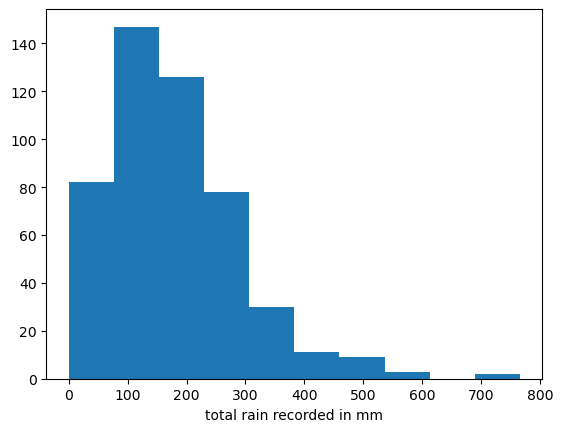

In [51]:
plt.hist(rain_total['total_rainfall']);
plt.xlabel('total rain recorded in mm');

Text(0.5, 0, 'Monthly total rain recorded in mm.')

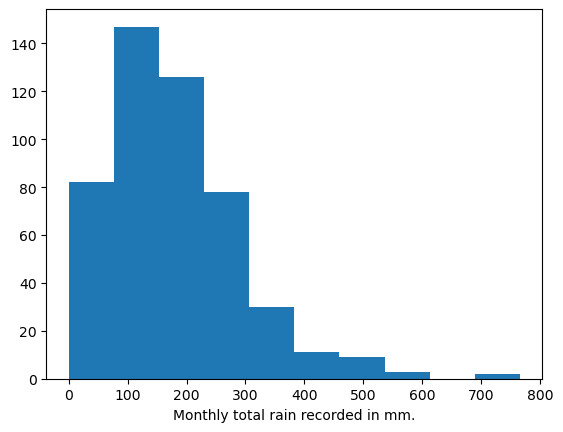

In [52]:
plt.hist(rain_total['total_rainfall']);
plt.xlabel('Monthly total rain recorded in mm.')

In [53]:
Q1 = rain_days['no_of_rainy_days'].quantile(0.25)
Q3 = rain_days['no_of_rainy_days'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rain_outliers = rain_days[(rain_days['no_of_rainy_days'] < lower_bound) | (rain_days['no_of_rainy_days'] > upper_bound)]
rain_outliers

,month,no_of_rainy_days,year,Month


Text(0.5, 0, 'Monthly number of rain days(total rainfallis 0.2mm/day or more)')

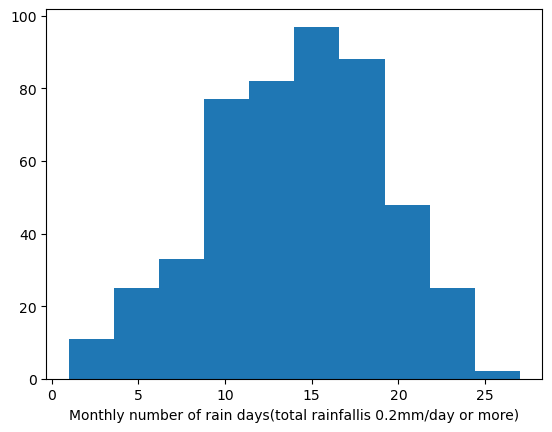

In [54]:
plt.hist(rain_days['no_of_rainy_days']);
plt.xlabel('Monthly number of rain days(total rainfallis 0.2mm/day or more)')

In [55]:
# example of sortingdataframe by a column

sorted_pm25 = air_poll.sort_values(by='pm2.5_mean')
sorted_pm25

,year,rainydays,totalrainfall,sunshine_mean,temp_min,temp_max,rh_mean,pm2.5_mean,o3_mean,no2_mean
20,2020,178,1886.6,5.875000,25.450000,31.666667,78.083333,11.0,145.0,20
21,2021,182,2809.6,6.125000,25.258333,31.666667,78.450000,12.0,176.0,25
17,2017,204,2045.6,5.800000,25.241667,31.141667,82.625000,14.0,191.0,25
18,2018,188,1708.2,5.750000,25.358333,31.583333,79.600000,15.0,150.0,26
16,2016,179,1955.7,6.000000,25.783333,31.991667,75.950000,15.0,115.0,26
19,2019,120,1367.5,6.783333,25.916667,32.300000,76.650000,16.0,125.0,23
8,2008,182,2325.1,5.241667,24.741667,31.091667,83.408333,16.0,183.0,22
10,2010,178,2075.1,5.691667,24.866667,31.933333,82.875000,17.0,139.0,23
11,2011,188,2524.2,5.575000,24.708333,31.175000,84.625000,17.0,123.0,25
14,2014,152,1538.4,5.975000,25.258333,31.583333,78.525000,18.0,135.0,24


In [56]:
#example of using boolean filtering (i.e., masking) to select a subset of the dataframe.
#PM2.5 at or below 12 μg/m3 is considered healthy with little to no risk from exposure
#https://www.indoorairhygiene.org/pm2-5-explained/#:~:text=Most%20studies%20indicate%20PM2.,breathing%20issues%20such%20as%20asthma.
filtered_pm25 = air_poll[air_poll['pm2.5_mean'] <= 12]
filtered_pm25

,year,rainydays,totalrainfall,sunshine_mean,temp_min,temp_max,rh_mean,pm2.5_mean,o3_mean,no2_mean
20,2020,178,1886.6,5.875,25.450000,31.666667,78.083333,11.0,145.0,20
21,2021,182,2809.6,6.125,25.258333,31.666667,78.450000,12.0,176.0,25


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


Text(0, 0.5, 'rainydays')

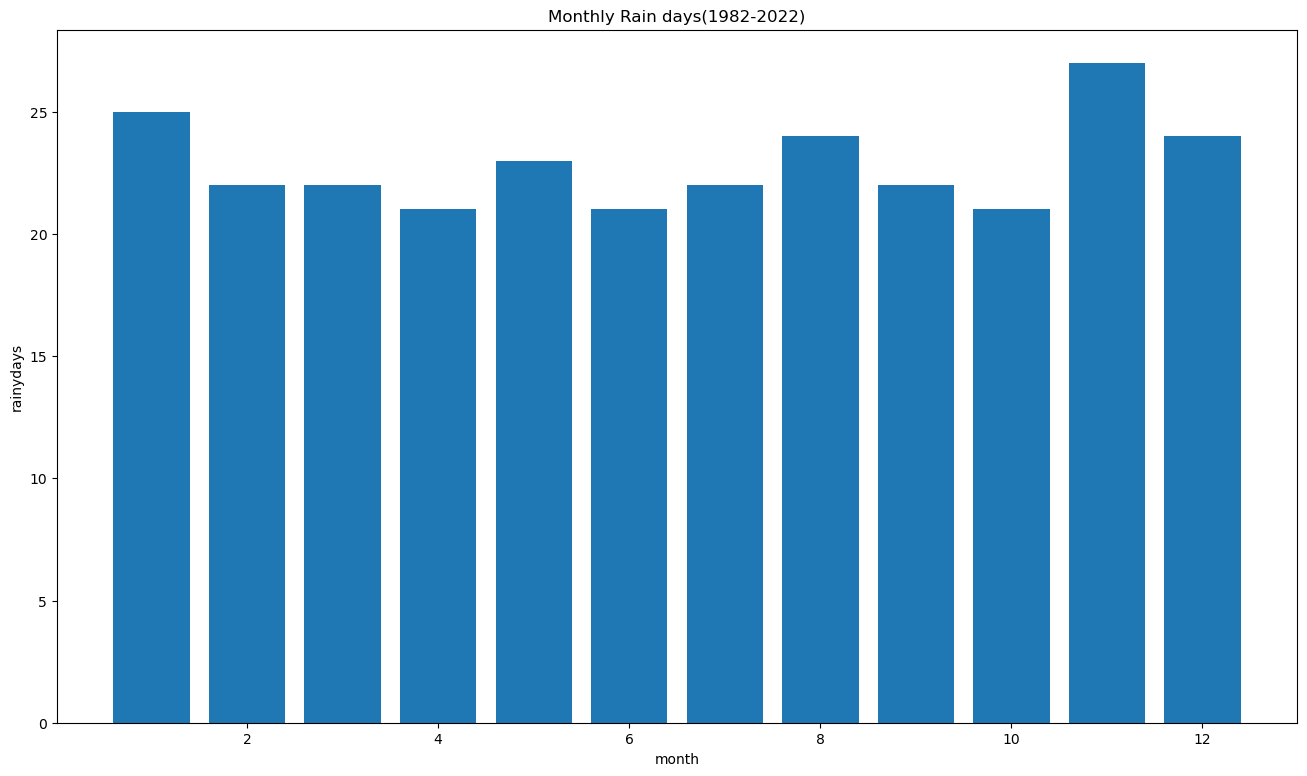

In [57]:
plt.figure(figsize = (16, 9))

x = weather['Month']
y = weather['no_of_rainy_days']
plt.bar(x, y) 
# set title and labels 
# x = np.arange(2002, 2022, 1)
# plt.xticks(x, fontsize = 10)
plt.title('Monthly Rain days(1982-2022)') 
plt.xlabel('month') 
plt.ylabel('rainydays')

Text(0, 0.5, 'total_rainfall')

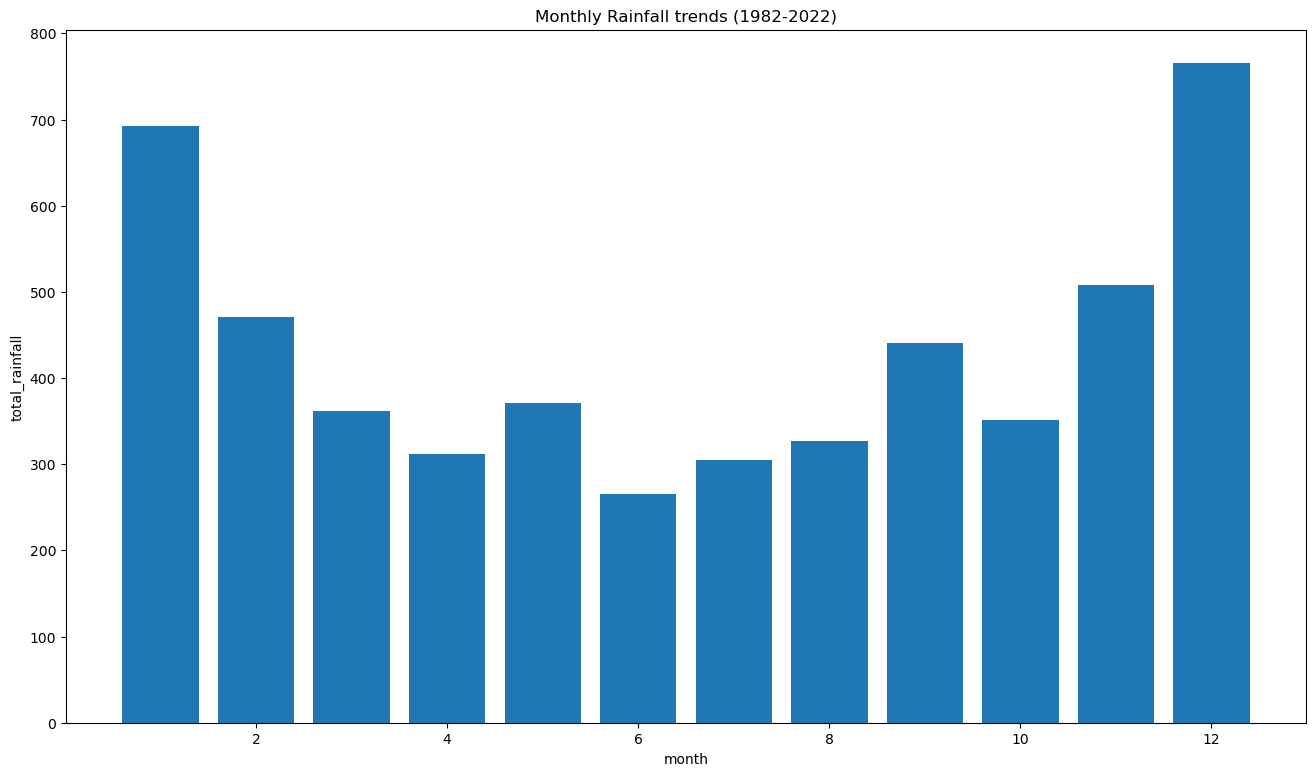

In [58]:
plt.figure(figsize = (16, 9))

x = weather['Month']
y = weather['total_rainfall']
plt.bar(x, y) 
# set title and labels 
# x = np.arange(2002, 2022, 1)
# plt.xticks(x, fontsize = 10)
plt.title('Monthly Rainfall trends (1982-2022)') 
plt.xlabel('month') 
plt.ylabel('total_rainfall')

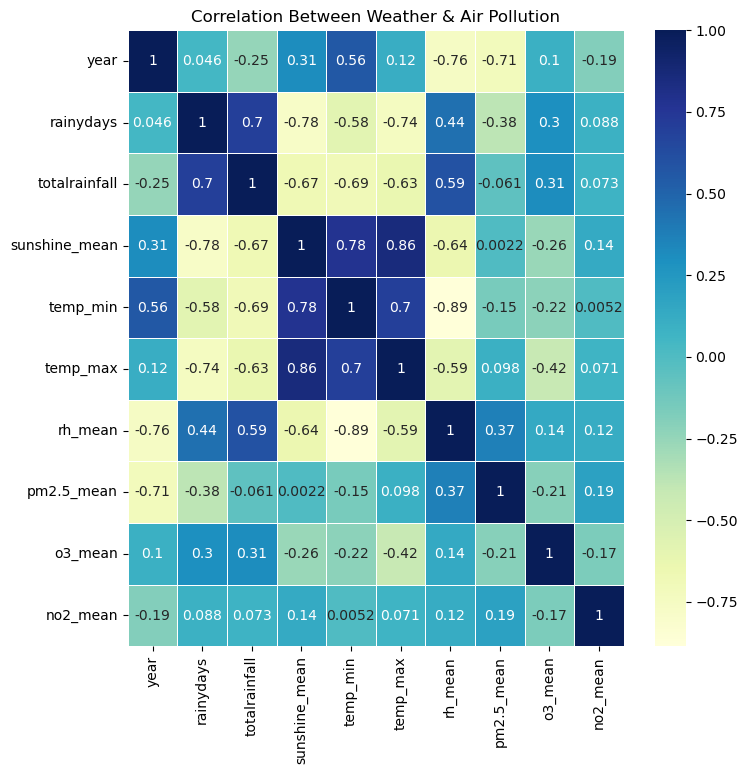

In [59]:
correlation_matrix = air_poll.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True,cmap="YlGnBu", linewidths=.5)
plt.title('Correlation Between Weather & Air Pollution')
plt.show()

- Sunshine hours has a strong correlation of 0.86 to maximum temperature and correlation of 0.78 to minimum temperature.
- Total rainfall has a strong correlation of 0.7 to rain days and correlation of 0.59 to relative humidity.
- Rain days has a correlation of 0.44 to relative humidity.
- Relative humidity has a correlation of 0.37 to pm2.5.
- Total rainfall has a correlation of 0.31 to ozone.
- Rain days has a correlation of 0.3 to ozone.

C:\Users\Pattr11\AppData\Local\Temp\ipykernel_27628\2360812366.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = weather.corr()


Text(0.5, 1.0, 'Correlation Between Weather')

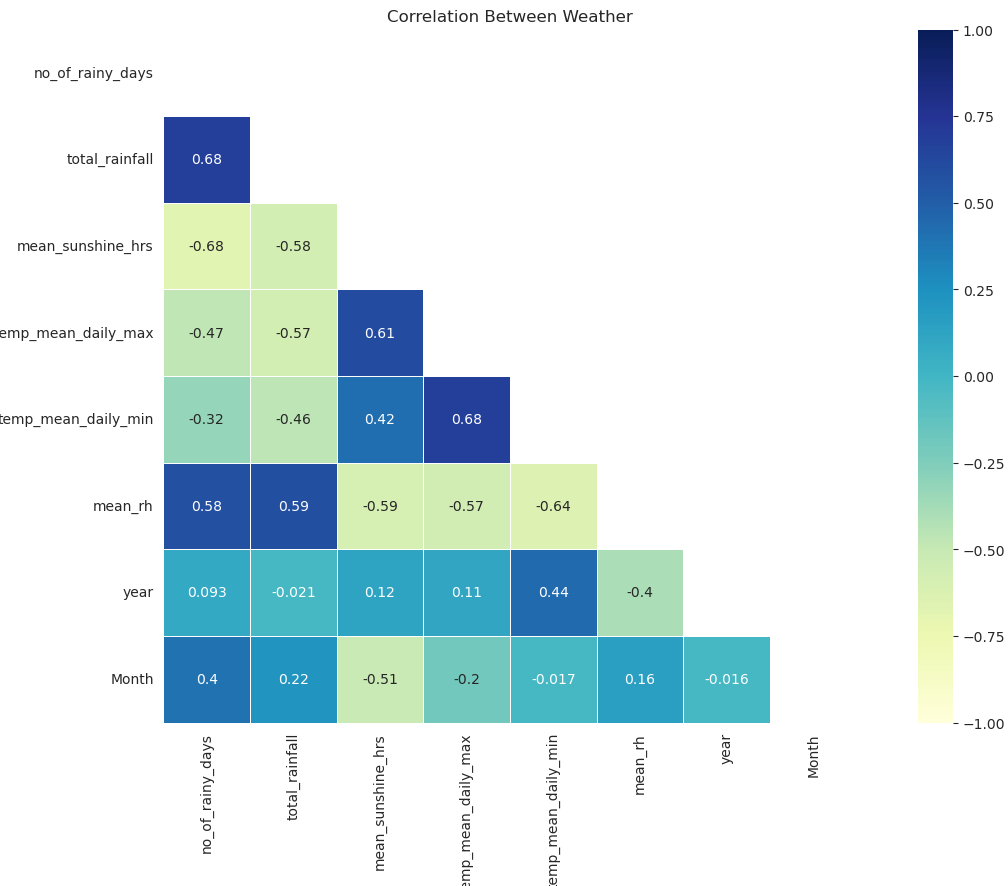

In [60]:
plt.figure(figsize = (16,9))

corr = weather.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5 , cmap="YlGnBu")
plt.title('Correlation Between Weather')

Text(0.5, 1.0, 'Sunshine with maximum temperature')

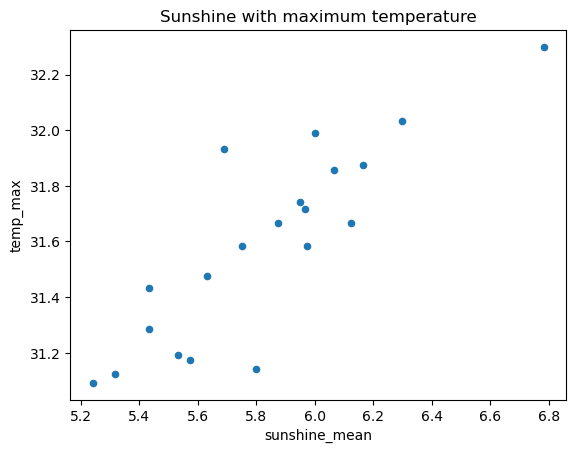

In [63]:
air_poll.plot(kind = 'scatter' , x = 'sunshine_mean' , y = 'temp_max')
plt.title('Sunshine with maximum temperature')

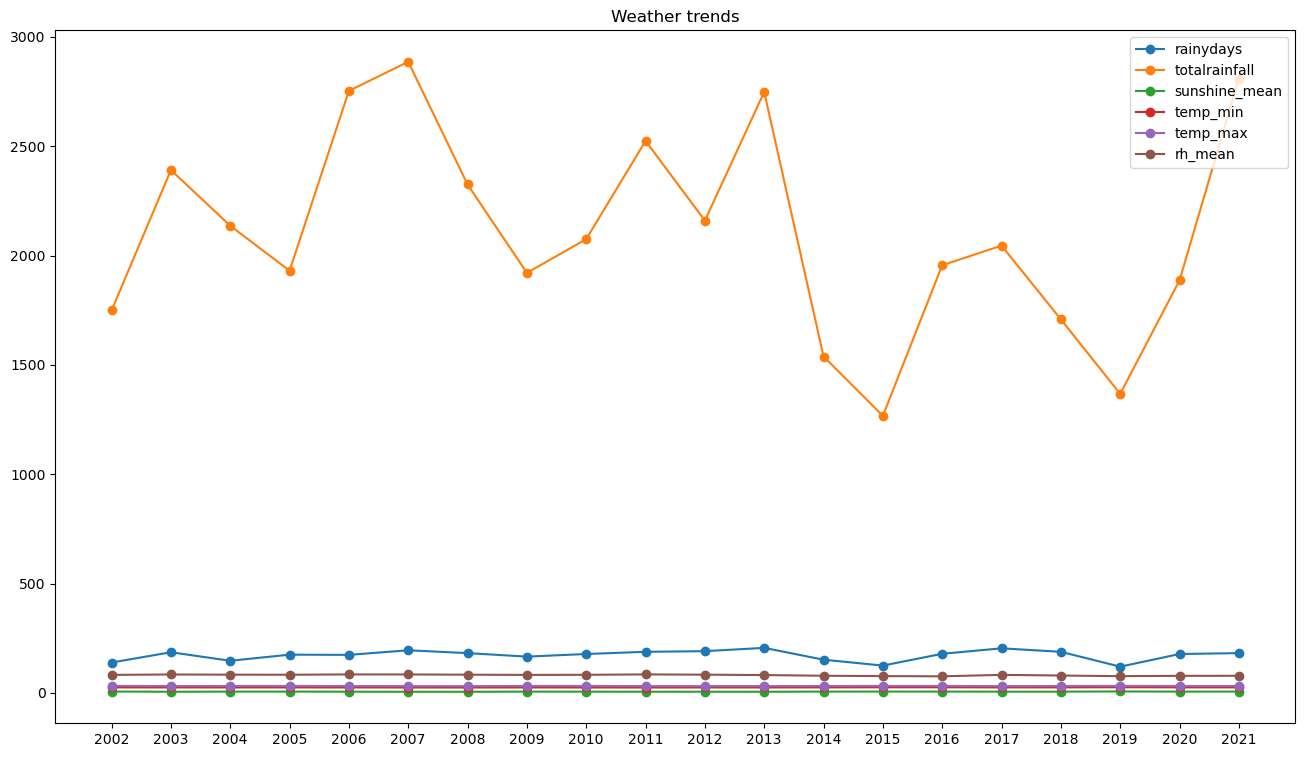

In [64]:
plt.figure(figsize = (16, 9))

sum_weather = air_poll[['rainydays', 'totalrainfall' , 'sunshine_mean' , 'temp_min' , 'temp_max' , 
                        'rh_mean']]

for sumw in sum_weather:
    time = air_poll['year']
    cond = sum_weather[sumw]
    plt.plot(time,cond,label = sumw, marker = 'o');

plt.legend(loc = 'upper right') # position legend 
x = np.arange(2002, 2022, 1)
plt.xticks(x, fontsize = 10)
plt.title('Weather trends');



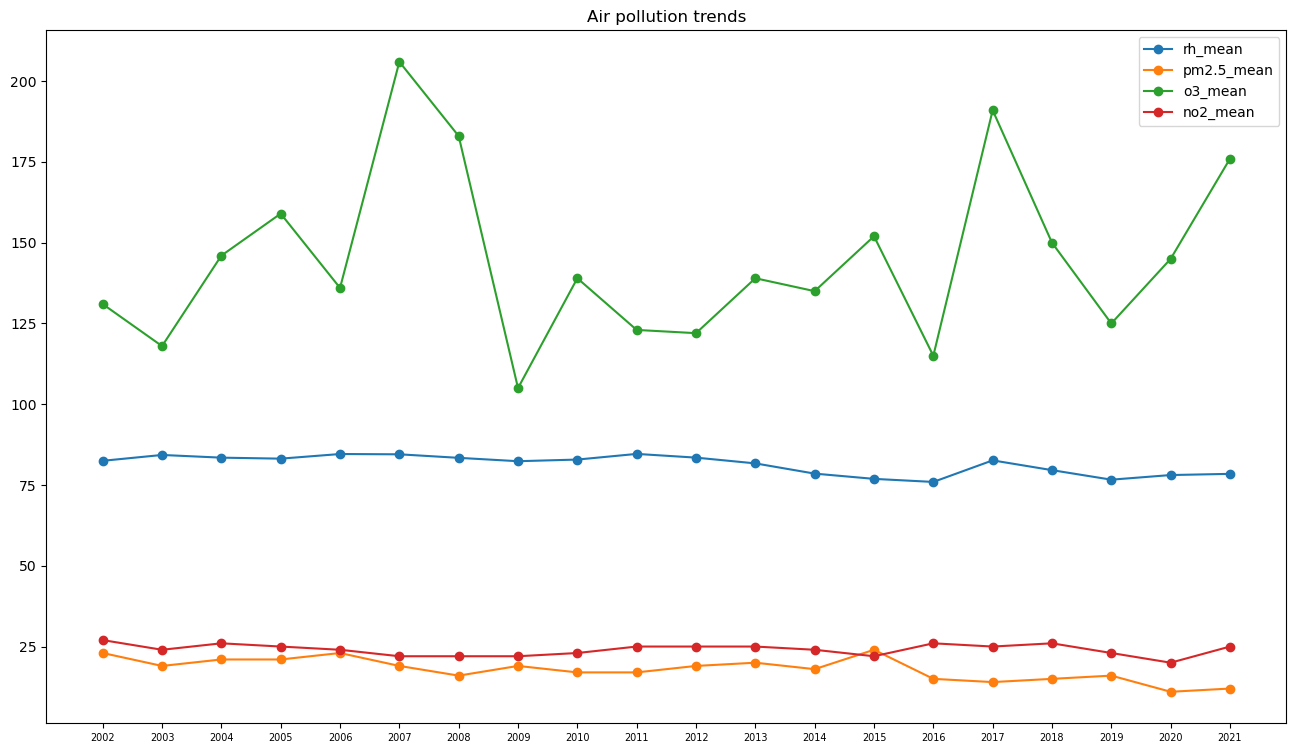

In [65]:
plt.figure(figsize = (16, 9))

polls = air_poll[['rh_mean' , 'pm2.5_mean' ,'o3_mean' ,'no2_mean']]

for poll in polls:
    year = air_poll['year']
    cond = polls[poll]
    plt.plot(year,cond, label = poll, marker = 'o');

plt.legend(loc = 'upper right') # position legend 
x = np.arange(2002, 2022, 1)
plt.xticks(x, fontsize = 7)
plt.title('Air pollution trends');

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!